In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# Import libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score ,classification_report

In [12]:
#load data 
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

df_encoded = df.copy()


le = LabelEncoder()

for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

df_encoded.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
# Data wrangling/ cleaing
print(df_encoded.isnull().sum())
print(df_encoded.duplicated().sum())
df_encoded = df_encoded .drop_duplicates()
print(df.shape)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
0
(8124, 23)


# Data Visualization

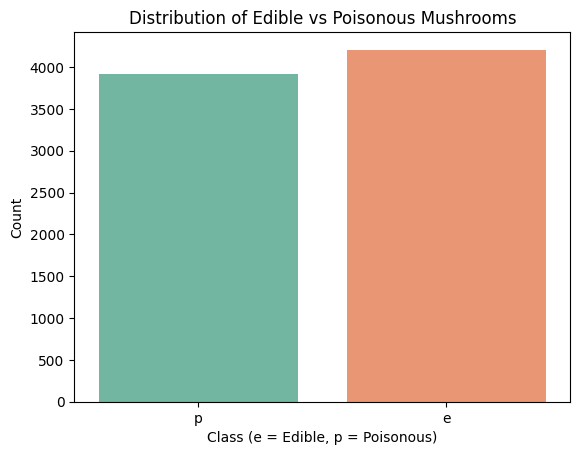

In [16]:
sns.countplot(data=df, x='class', palette='Set2')
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Class (e = Edible, p = Poisonous)")
plt.ylabel("Count")
plt.show()


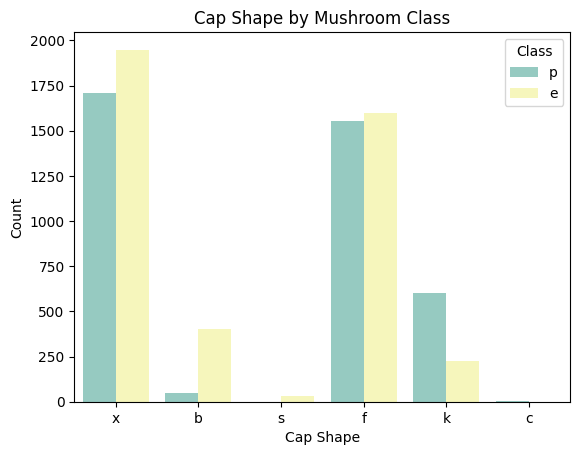

In [17]:
sns.countplot(data=df, x='cap-shape', hue='class', palette='Set3')
plt.title("Cap Shape by Mushroom Class")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


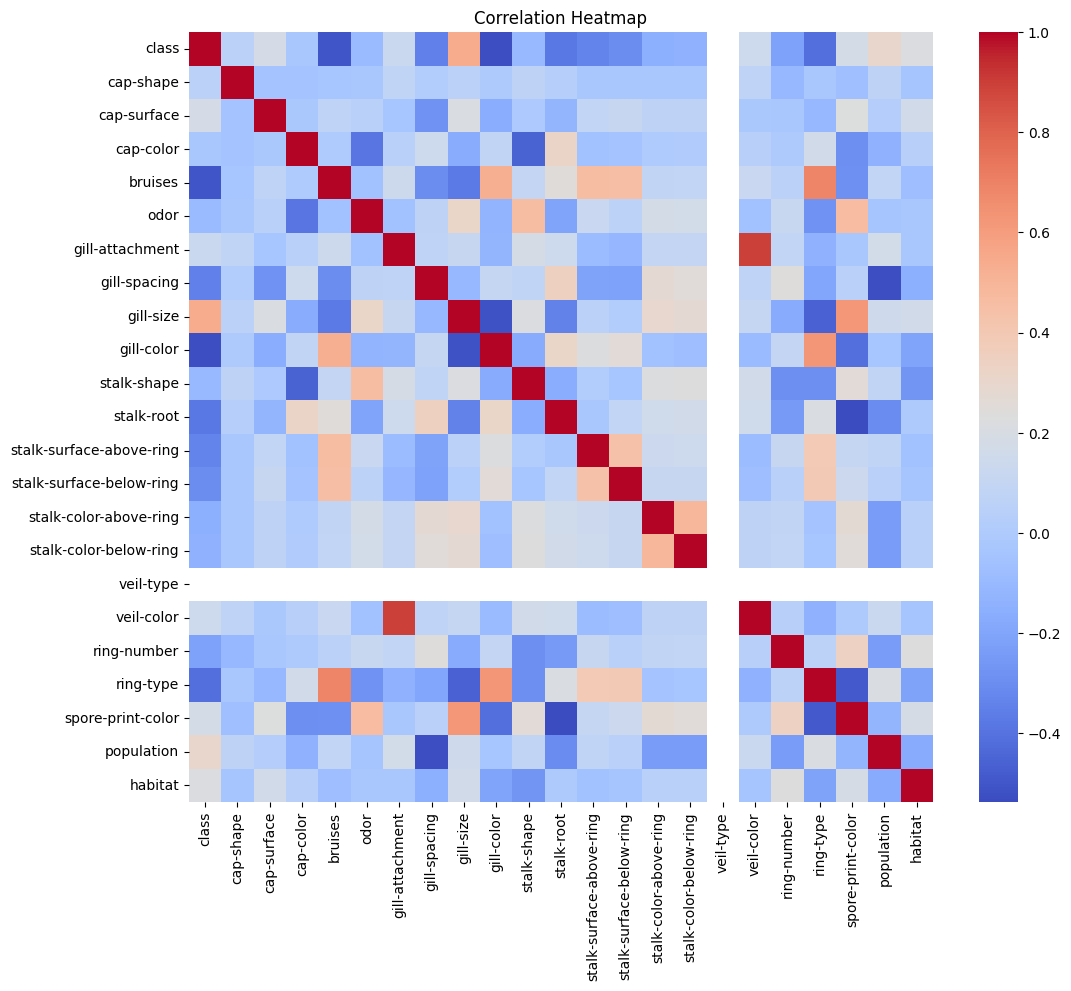

In [18]:

plt.figure(figsize=(12, 10))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


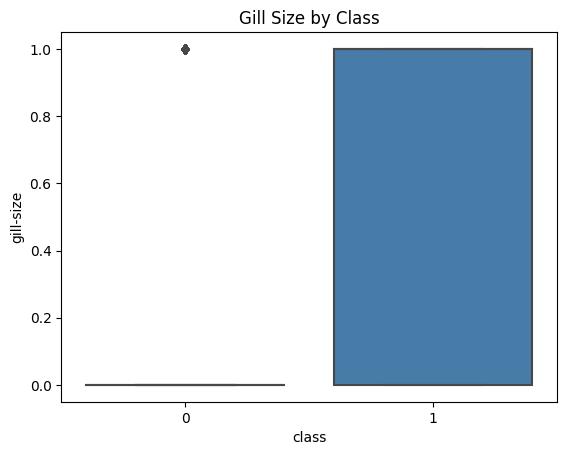

In [19]:
sns.boxplot(data=df_encoded, x='class', y='gill-size', palette="Set1")
plt.title("Gill Size by Class")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

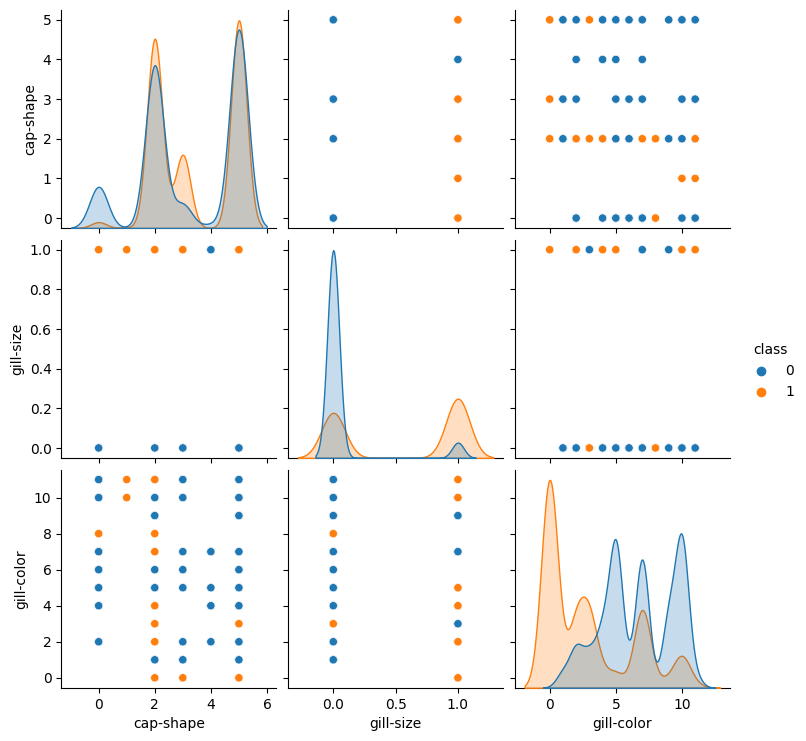

In [20]:
sns.pairplot(df_encoded[['class', 'cap-shape', 'gill-size', 'gill-color']], hue='class')
plt.show()


# Build Models

# Linear vs Non-Linear SVM

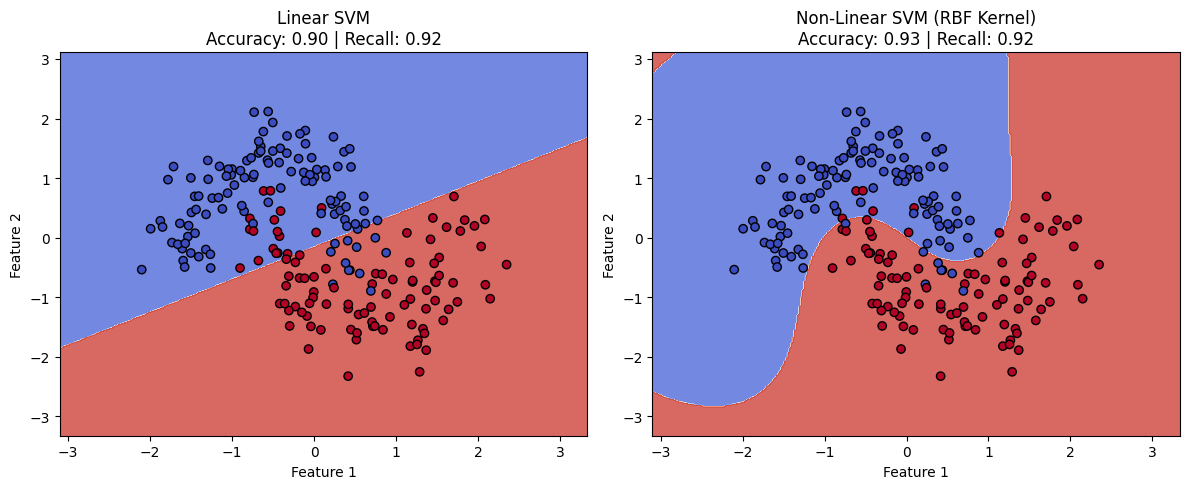

In [26]:

# Generate synthetic non-linear data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
rec_linear = recall_score(y_test, y_pred_linear)

# Train RBF (non-linear) SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
rec_rbf = recall_score(y_test, y_pred_rbf)

# Plotting function
def plot_svm_decision_boundary(model, X, y, title, acc, rec):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"{title}\nAccuracy: {acc:.2f} | Recall: {rec:.2f}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Visualize both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_svm_decision_boundary(svm_linear, X_train_scaled, y_train, "Linear SVM", acc_linear, rec_linear)

plt.subplot(1, 2, 2)
plot_svm_decision_boundary(svm_rbf, X_train_scaled, y_train, "Non-Linear SVM (RBF Kernel)", acc_rbf, rec_rbf)

plt.tight_layout()
plt.show()


# Polynomial Features Vs . Polynomial Kernal (SVM)

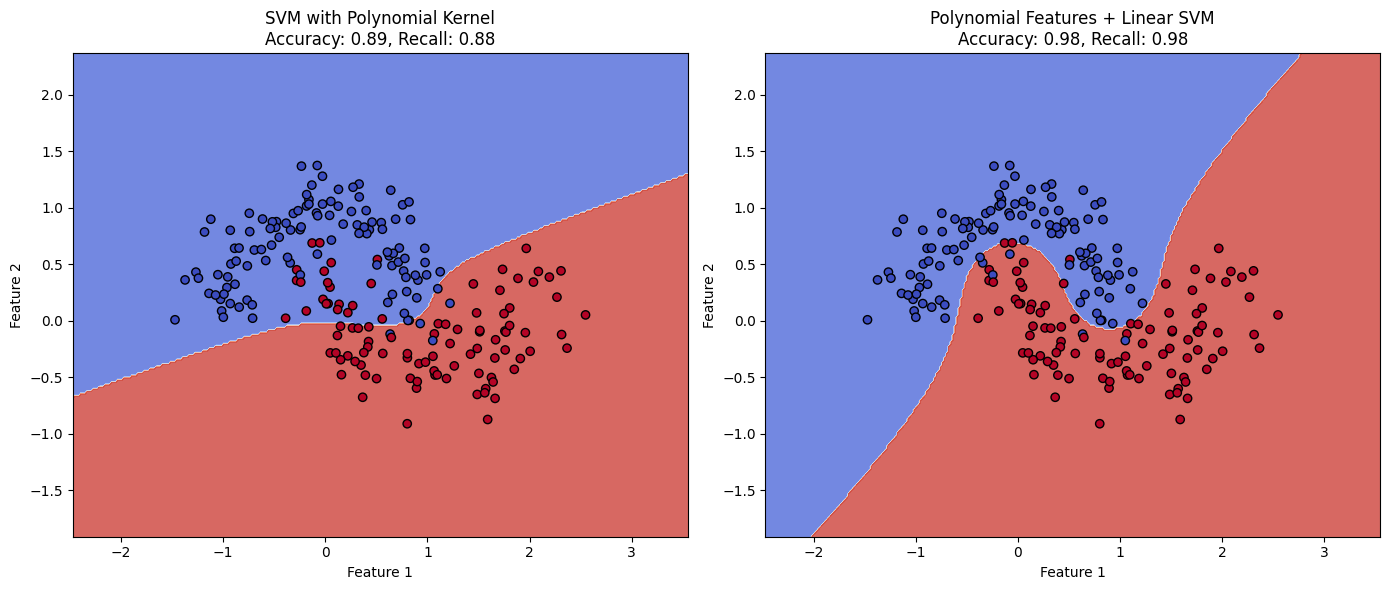

In [28]:

# Generate synthetic non-linear data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# First method: SVM with Polynomial Kernel
svm_poly_kernel = SVC(kernel='poly', degree=3)
svm_poly_kernel.fit(X_train_scaled, y_train)
y_pred_poly_kernel = svm_poly_kernel.predict(X_test_scaled)
acc_poly_kernel = accuracy_score(y_test, y_pred_poly_kernel)
recall_poly_kernel = recall_score(y_test, y_pred_poly_kernel)

# Second method: Polynomial Features + SVM Linear Kernel
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

svm_linear_poly = SVC(kernel='linear')
svm_linear_poly.fit(X_train_poly, y_train)
y_pred_poly_feat = svm_linear_poly.predict(X_test_poly)
acc_poly_feat = accuracy_score(y_test, y_pred_poly_feat)
recall_poly_feat = recall_score(y_test, y_pred_poly_feat)

# Visualization function
def plot_decision_boundary(model, X, y, title, poly_transformer=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if poly_transformer:
        grid = poly_transformer.transform(scaler.transform(grid))
    else:
        grid = scaler.transform(grid)
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot both models
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_poly_kernel, X_train, y_train, f"SVM with Polynomial Kernel\nAccuracy: {acc_poly_kernel:.2f}, Recall: {recall_poly_kernel:.2f}")

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_linear_poly, X_train, y_train, f"Polynomial Features + Linear SVM\nAccuracy: {acc_poly_feat:.2f}, Recall: {recall_poly_feat:.2f}", poly_transformer=poly)
plt.tight_layout()
plt.show()


# Naive Bayes

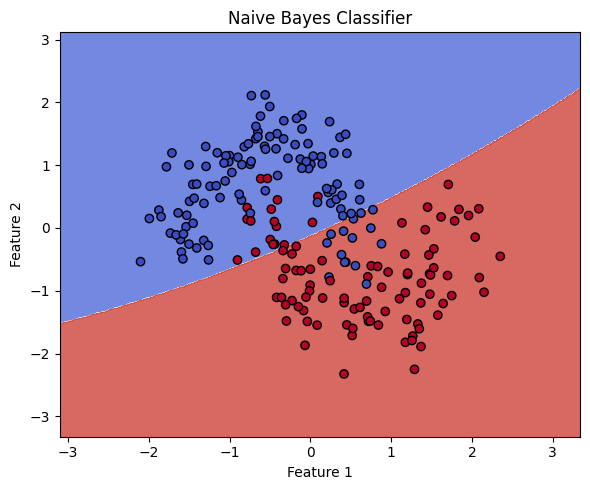

Naive Bayes Accuracy: 0.90
Recall per class:
Class 0: 0.87, Class 1: 0.92


In [30]:

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_scaled)

# Accuracy and report
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Visualization function
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plotting
plt.figure(figsize=(6,5))
plot_decision_boundary(nb_model, X_train_scaled, y_train, "Naive Bayes Classifier")
plt.tight_layout()
plt.show()

# Print results
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")
print("Recall per class:")
print(f"Class 0: {report_nb['0']['recall']:.2f}, Class 1: {report_nb['1']['recall']:.2f}")
